<a href="https://colab.research.google.com/github/matteuscruz/yolov9/blob/main/YOLOv9_Treinamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Selecionar o Tipo de Acelerador de Hardware:


1.   Depois de criar ou abrir um notebook, vá para o menu "Ambiente de execução" na barra de menu.
2.   Selecione "Alterar tipo de ambiente de execução".
3.   Um pop-up será exibido com opções para "Hardware de execução", escolha "GPU".
4.   Salvar as Configurações:
5.   Clique em "Salvar" e o ambiente será alterado.

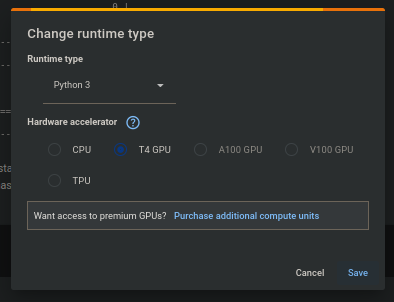

**Verificar a GPU Disponível**: O comando nvidia-smi fornece informações sobre a utilização da GPU da NVIDIA.

In [1]:
!nvidia-smi

Thu Mar  7 16:01:03 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**NOTA:** Informações Gerais: o comando nvidia-smi fornece uma visão detalhada do status da GPU, incluindo sua utilização, temperatura, energia e processos em execução, sendo útil para monitorar e diagnosticar problemas de desempenho da GPU em sistemas que possuem placas de vídeo da NVIDIA.


> **Descrição do código:** Importa o módulo os, que fornece funções para interagir com o sistema operacional, e define uma variável HOME para armazenar o diretório atual de trabalho utilizando a função os.getcwd(), que retorna o diretório atual.







In [2]:
import os
HOME = os.getcwd()
print('Diretório atual de trabalho: ', HOME)

Diretório atual de trabalho:  /content


## Instalação do YOLOv9

**Descrição do código:** Este conjunto de comandos:

1.    Usa o Git para clonar um repositório do GitHub, navega até o diretório clonado
2.   Instala os requisitos especificados no arquivo requirements.txt usando o pip.


In [3]:
%%capture
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

**Descrição do Código:** Vamos instalar o pacote [`roboflow`](https://pypi.org/project/roboflow), que vamos utilizar para baixar o nosso conjunto de dados do [Roboflow Universe](https://universe.roboflow.com/).

In [4]:
%%capture
!pip install -q roboflow

**NOTE:** In the YOLOv9 paper, versions `yolov9-s` and `yolov9-m` are also mentioned, but the weights for these models are not yet available in the YOLOv9 [repository](https://github.com/WongKinYiu/yolov9).

In [5]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

## Fazendo uma inferência:

Em *Machine Learning*, inferência refere-se ao processo de aplicar um modelo treinado para fazer previsões ou estimativas a partir de novos dados que o modelo ainda não viu durante o treinamento. Quando um modelo de machine learning é treinado, ele aprende padrões nos dados de treinamento para realizar uma tarefa específica, como classificação, regressão ou detecção de objetos. Uma vez treinado, o modelo é capaz de generalizar esses padrões e aplicá-los a novos dados para fazer previsões ou inferências sobre eles.

In [13]:
# Baixando a imagem selecionada
!wget -P {HOME} -q 'https://blog-voomp.s3.us-east-1.amazonaws.com/wp-content/uploads/2021/09/pagina-20-valendo-7.jpg'

In [14]:
SOURCE_IMAGE_PATH = f"{HOME}/link_da_imagem"

In [15]:
# Fazendo inferência com os pesos: gelan-c.pt
!python detect.py --weights {HOME}/weights/gelan-c.pt --conf 0.1 --source {HOME}/pagina-20-valendo-7.jpg --device 0

detect: weights=['/content/weights/gelan-c.pt'], source=/content/pagina-20-valendo-7.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 467 layers, 25472640 parameters, 0 gradients, 102.8 GFLOPs
image 1/1 /content/pagina-20-valendo-7.jpg: 416x640 4 persons, 3 ties, 17 books, 155.0ms
Speed: 0.5ms pre-process, 155.0ms inference, 648.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


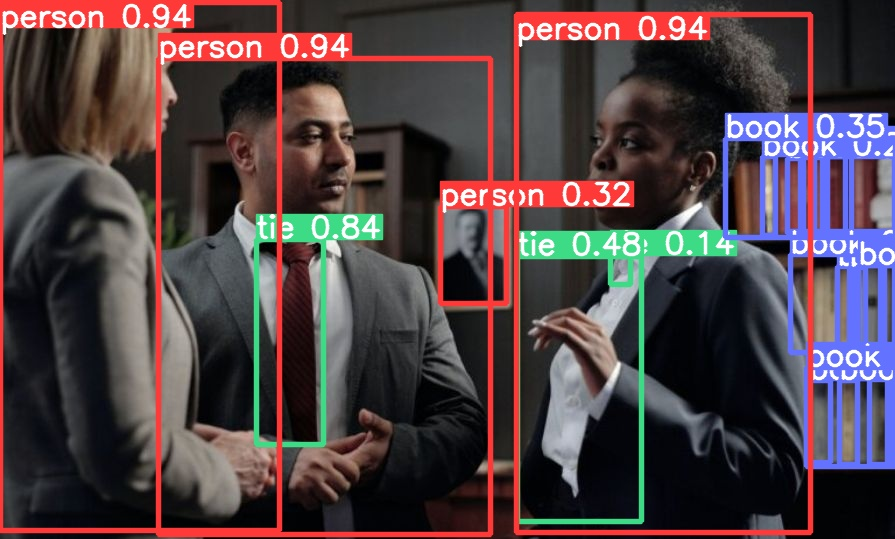

In [16]:
from IPython.display import Image
Image(filename=f"{HOME}/yolov9/runs/detect/exp/pagina-20-valendo-7.jpg", width=600)

In [17]:
# Fazendo inferência com o peso yolov9-e.pt
!python detect.py --weights {HOME}/weights/yolov9-e.pt --conf 0.1 --source {HOME}/pagina-20-valendo-7.jpg --device 0

detect: weights=['/content/weights/yolov9-e.pt'], source=/content/pagina-20-valendo-7.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 1119 layers, 69470144 parameters, 0 gradients, 244.0 GFLOPs
image 1/1 /content/pagina-20-valendo-7.jpg: 416x640 4 persons, 2 ties, 11 books, 165.8ms
Speed: 0.4ms pre-process, 165.8ms inference, 552.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp4


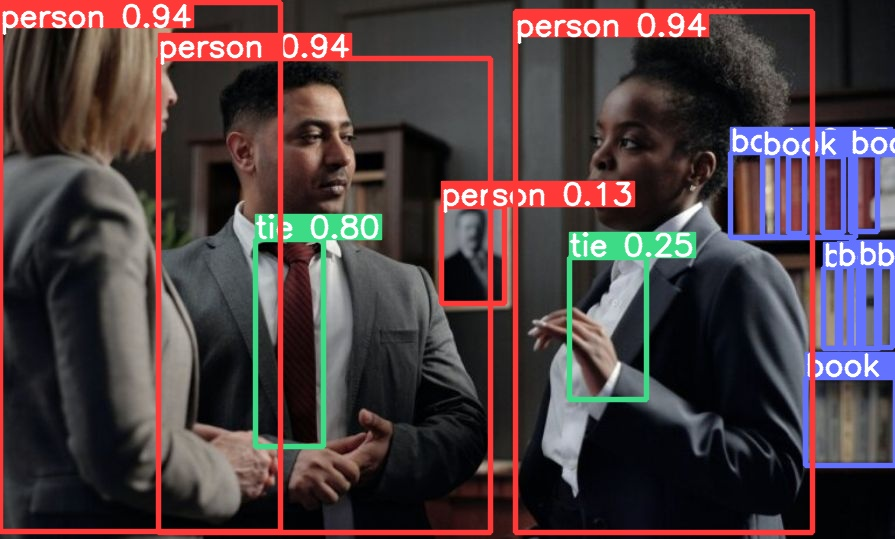

In [19]:
from IPython.display import Image
Image(filename=f"{HOME}/yolov9/runs/detect/exp4/pagina-20-valendo-7.jpg", width=600)

## Usando uma base de imagens customizável:

In [20]:
%cd {HOME}/yolov9

/content/yolov9


Para fins de demonstração, utilizaremos uma base de imagens fornecida pelo Roboflow para a detecção de jogadores de futebol. A detecção de jogadores de futebol em imagens é um problema interessante e desafiador no campo da visão computacional. Envolve a identificação e localização de jogadores em campo, independentemente da pose, da distância para a câmera e de possíveis obstruções por outros jogadores ou elementos do ambiente.

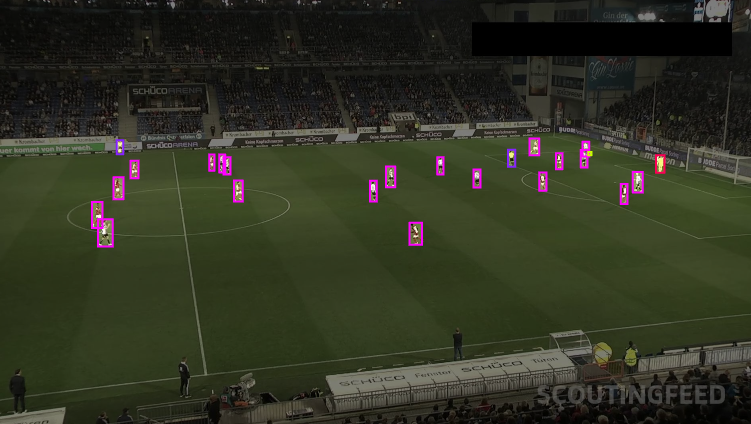

Para fazer uso das bases de imagens disponibilizadas pelo site é necessário o login ou criação de uma conta. Pois a próxima etapa exigirá o uso de um token de autenticação para download das imagens.

In [21]:
import roboflow
roboflow.login()
rf = roboflow.Roboflow()
project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
version = project.version(8)
dataset = version.download("yolov9")

visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to football-players-detection-8 in yolov9:: 100%|██████████| 522/522 [00:00<00:00, 2791.55it/s]


## Treinamento do modelo:

In [ ]:
%cd {HOME}/yolov9

!python train.py \
--batch 16 --epochs 25 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

**Descrição do código:**

* %cd {HOME}/yolov9: Este comando muda o diretório atual para {HOME}/yolov9. O {HOME} provavelmente é um espaço reservado para o diretório principal do usuário.

* !python train.py: Isso executa o script train.py usando Python.

  * **--batch 16**: Especifica o tamanho do lote para o treinamento, definido como 16 imagens por lote.

  * **--epochs 25**: Especifica o número de épocas de treinamento, definido como 25.

  * **--img 640**: Define o tamanho da imagem de entrada durante o treinamento como 640x640 pixels.

  * **--device 0**: Especifica o dispositivo a ser usado para o treinamento, geralmente uma GPU. Aqui, está configurado para o dispositivo 0.

  * **--data {dataset.location}/data.yaml**: Especifica a localização do arquivo YAML contendo informações sobre seu conjunto de dados.

  * **--weights {HOME}/weights/gelan-c.pt**: Especifica os pesos iniciais para o modelo. Aqui, está usando um modelo pré-treinado armazenado em {HOME}/weights/gelan-c.pt.

  * **--cfg models/detect/gelan-c.yaml**: Especifica o arquivo de configuração do modelo, que contém arquitetura e hiperparâmetros de treinamento.

  * **--hyp hyp.scratch-high.yaml**: Especifica o arquivo de hiperparâmetros para o treinamento.

## Examine Training Results

**IMPORTANTE:** Por padrão, os resultados de cada sessão de treinamento subsequente são salvos em **{HOME}/yolov9/runs/train/**, em diretórios numerados sequencialmente, como **exp**, **exp2**, **exp3**, e assim por diante. No entanto, é possível substituir este comportamento utilizando o parâmetro --name para especificar um nome personalizado para o diretório de saída.

In [ ]:
# Lista os arquivos gerados pelo treinamento.
!ls {HOME}/yolov9/runs/train/exp/

confusion_matrix.png				    P_curve.png       train_batch2.jpg
events.out.tfevents.1709205293.f80636ca2632.2700.0  PR_curve.png      val_batch0_labels.jpg
F1_curve.png					    R_curve.png       val_batch0_pred.jpg
hyp.yaml					    results.csv       val_batch1_labels.jpg
labels_correlogram.jpg				    results.png       val_batch1_pred.jpg
labels.jpg					    train_batch0.jpg  weights
opt.yaml					    train_batch1.jpg


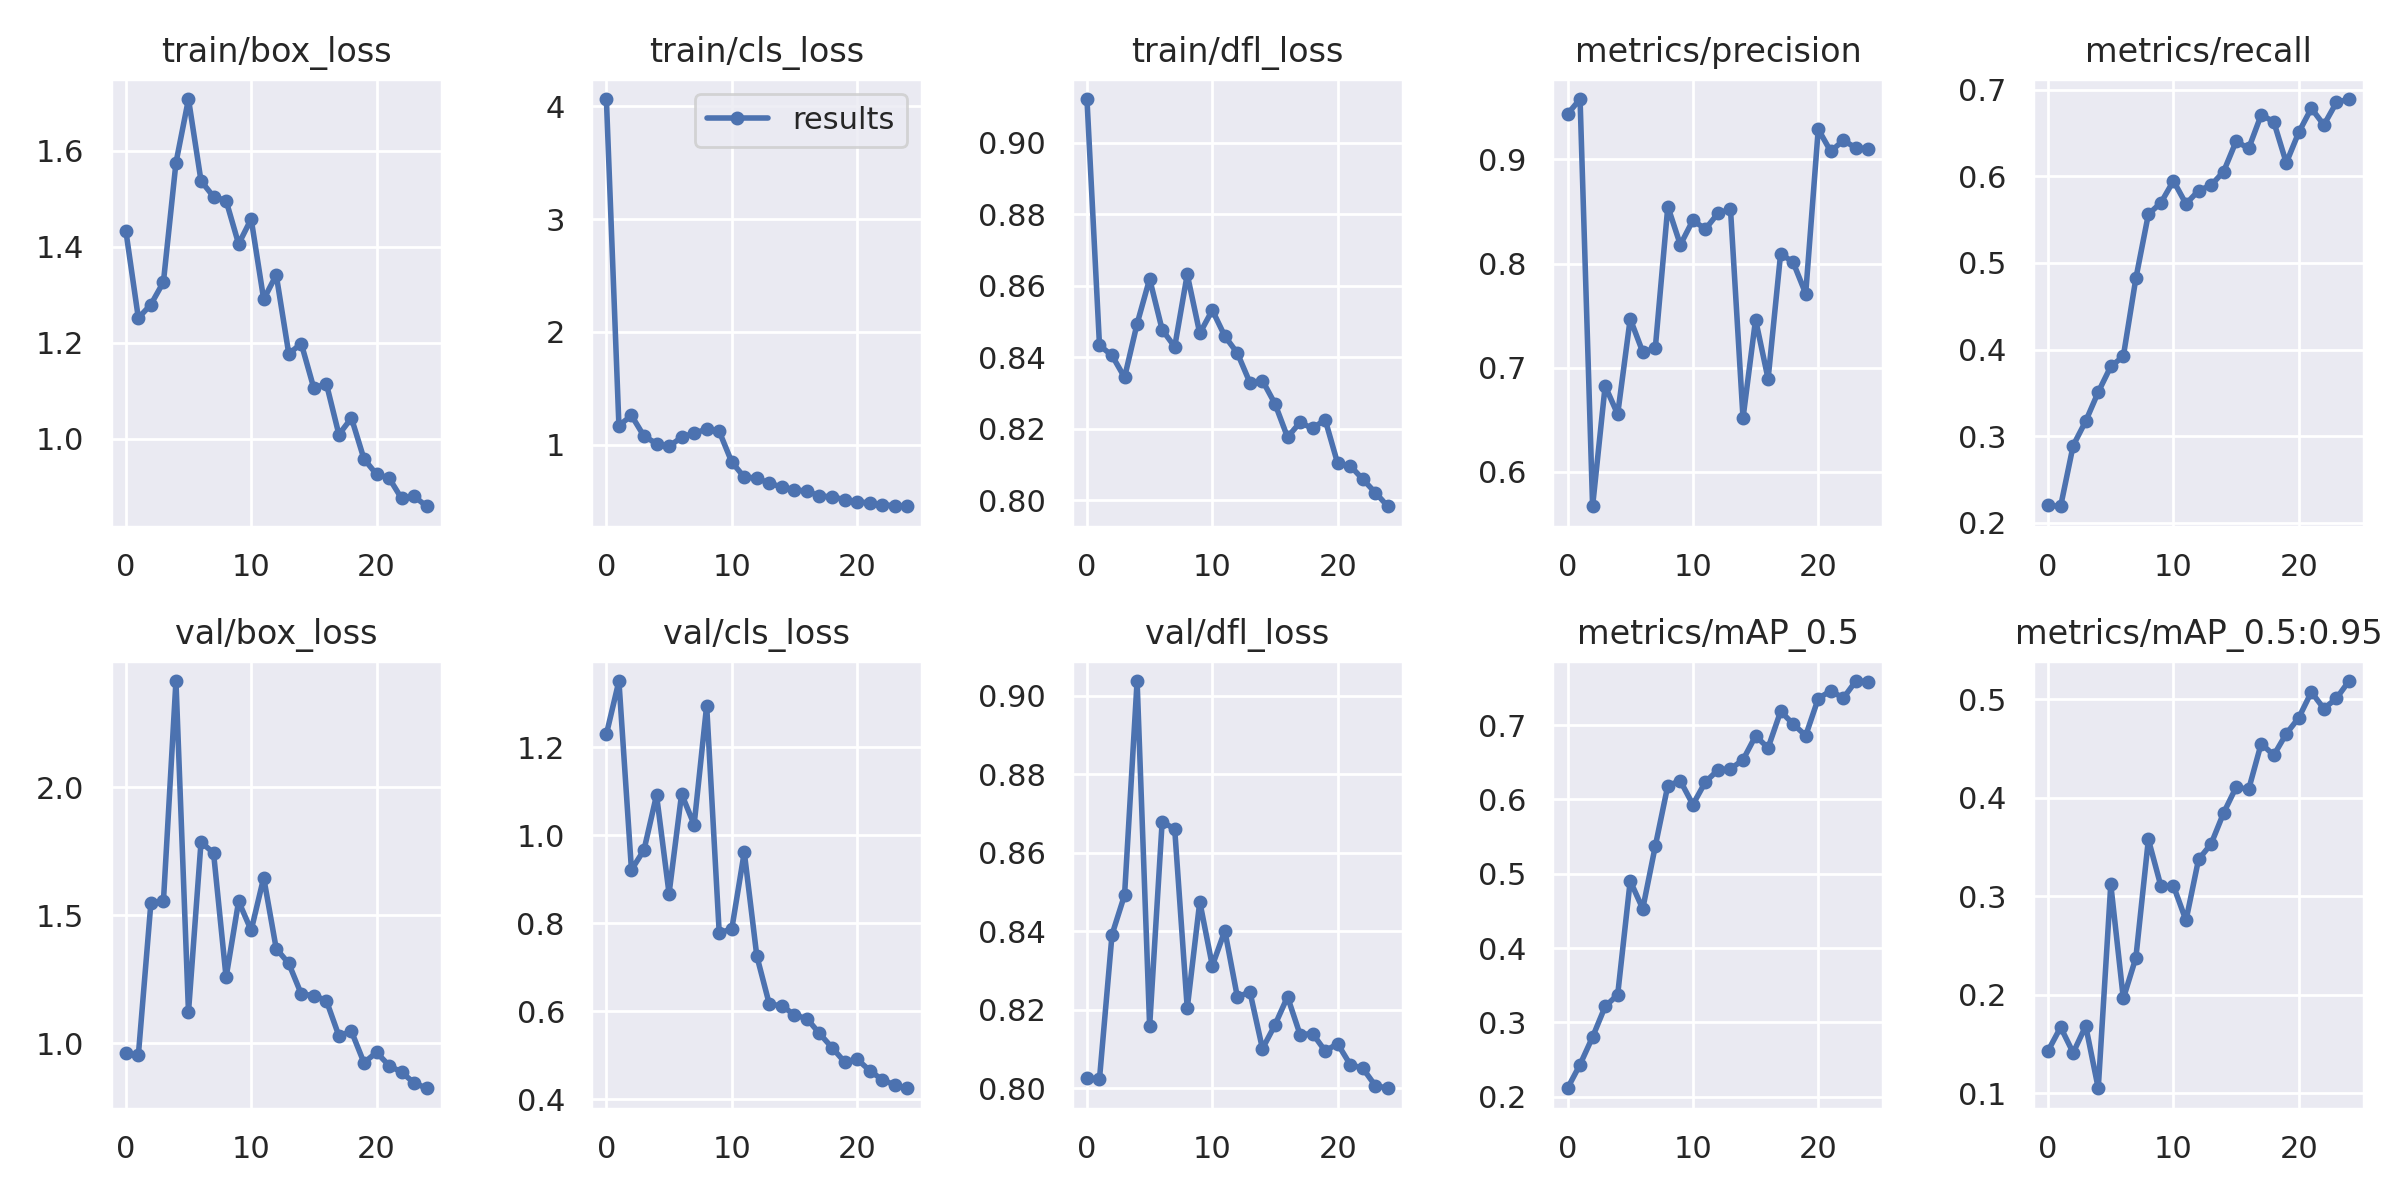

In [ ]:
from IPython.display import Image
Image(filename=f"{HOME}/yolov9/runs/train/exp/results.png", width=1000)

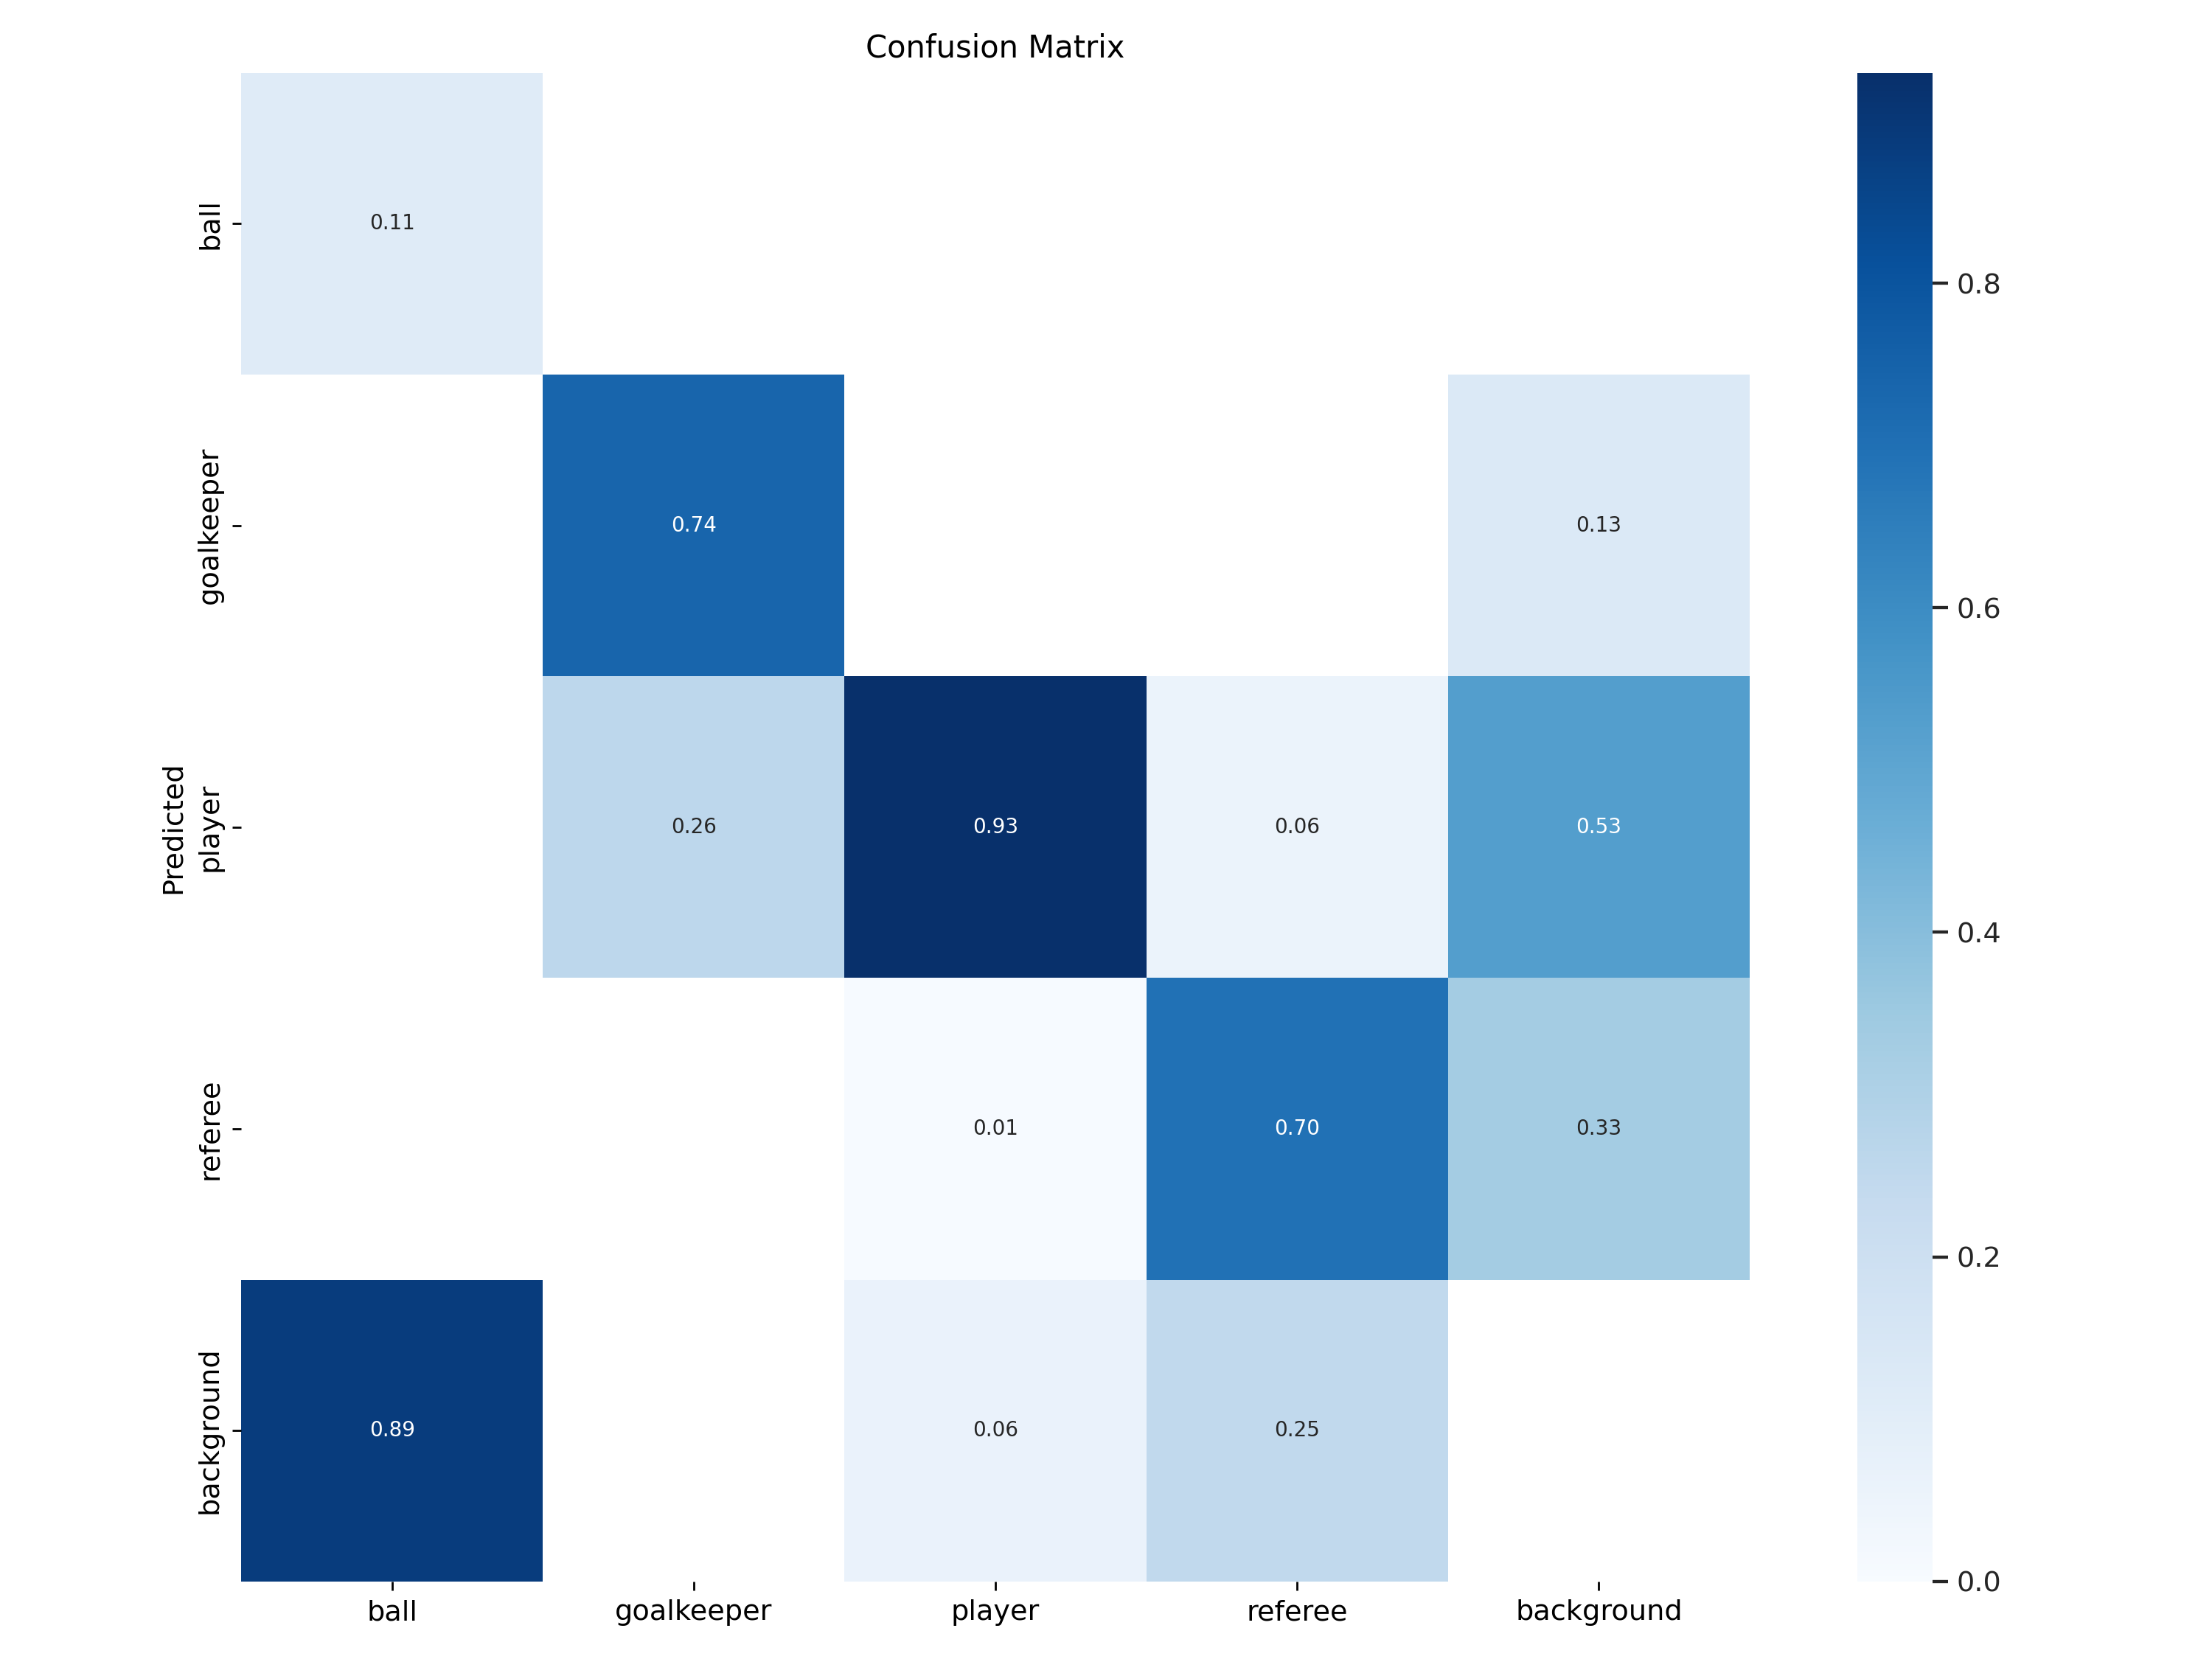

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/confusion_matrix.png", width=1000)

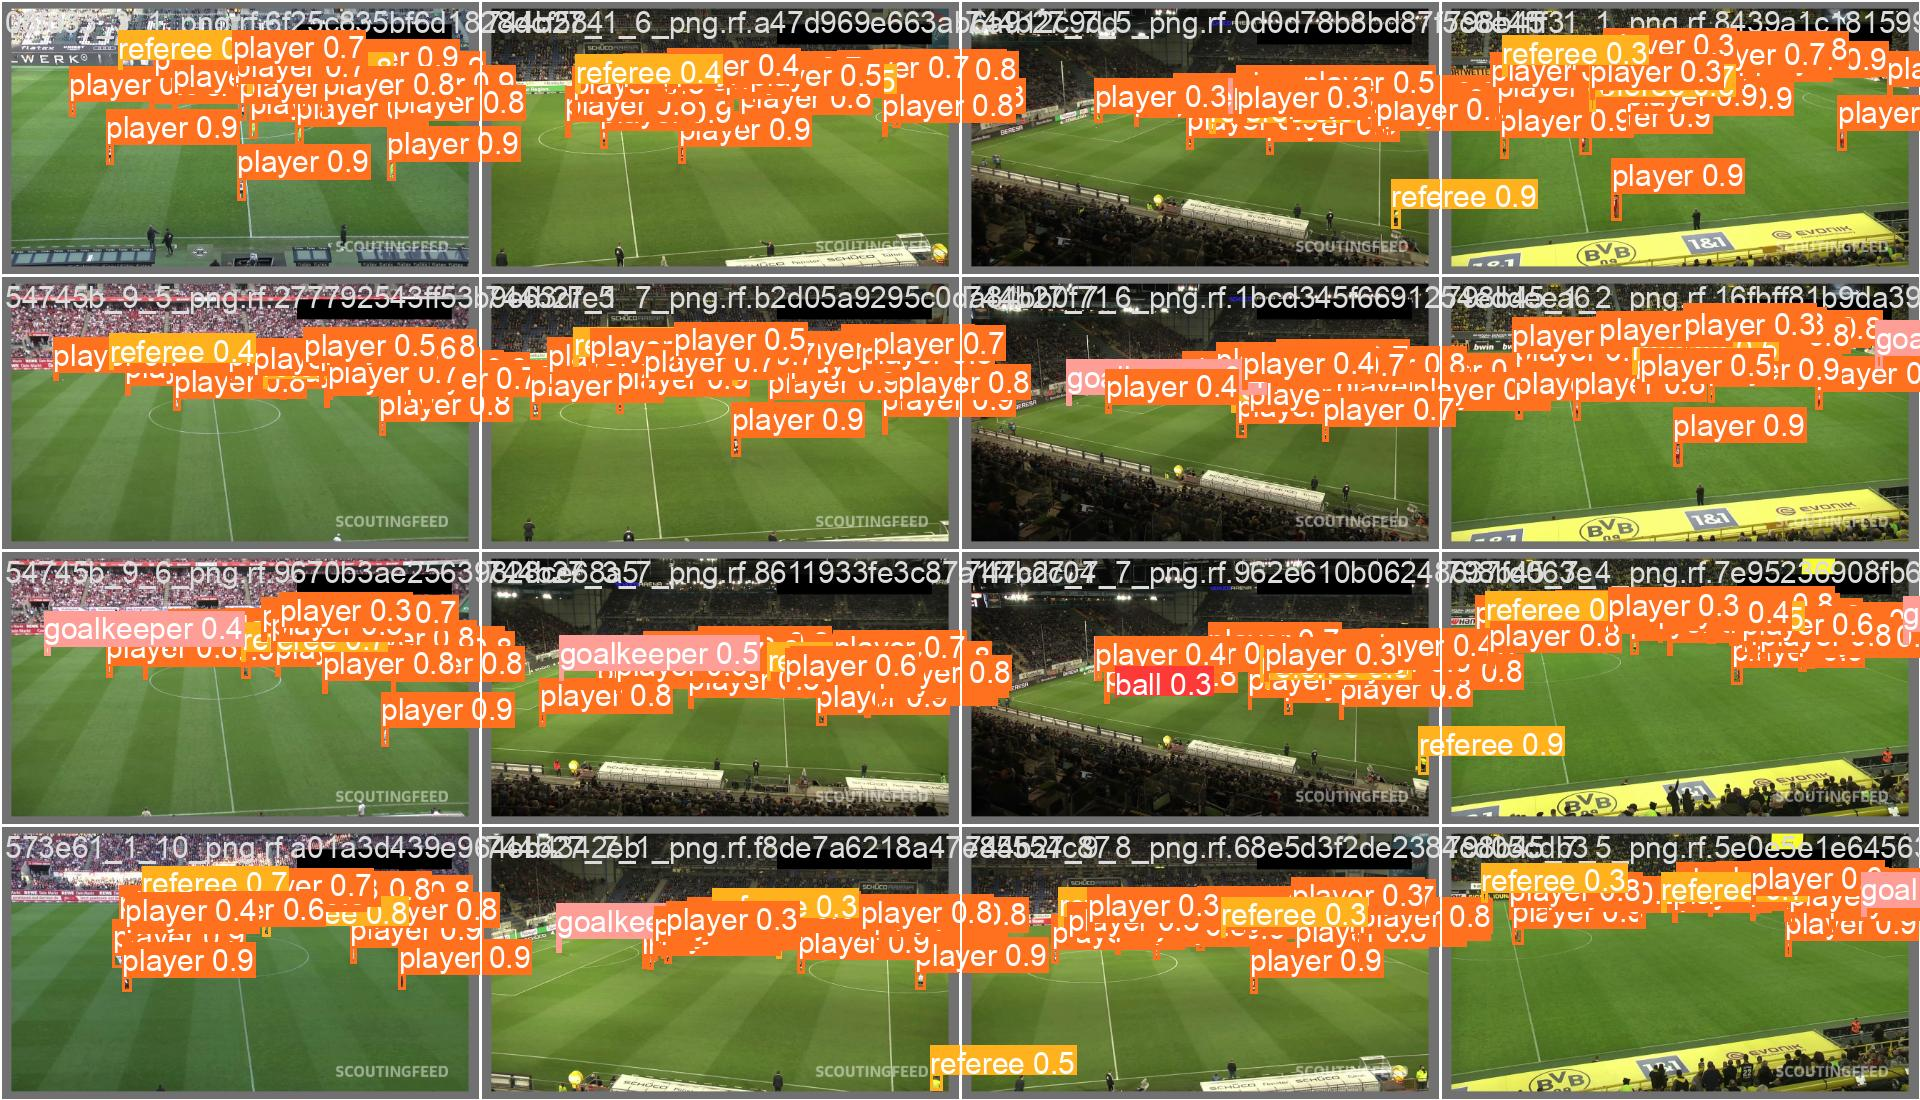

In [ ]:
from IPython.display import Image
Image(filename=f"{HOME}/yolov9/runs/train/exp/val_batch0_pred.jpg", width=1000)

## Validação

A validação em *machine learning* é uma etapa crucial no desenvolvimento de modelos para garantir que eles sejam capazes de generalizar bem para dados não vistos.

In [ ]:
%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt

* --img 640: Define o tamanho da imagem de entrada para o modelo como
640x640 pixels.
* --batch 32: Define o tamanho do lote (batch size) durante a validação como 32.
* --conf 0.001: Define o limite de confiança para a detecção de objetos. Apenas as detecções com uma pontuação de confiança acima deste limite serão consideradas válidas.
* --iou 0.7: Define a sobreposição mínima necessária entre as caixas delimitadoras para considerar duas detecções como referentes ao mesmo objeto durante o cálculo da métrica de Avaliação da Sobreposição da União (Intersection over Union - IoU).
* --device 0: Especifica o dispositivo (GPU) a ser usado para a execução do modelo. Neste caso, o dispositivo 0 (provavelmente a primeira GPU) será utilizado.
* --data {dataset.location}/data.yaml: Especifica o caminho para o arquivo de configuração de dados YAML que contém informações sobre o conjunto de dados, como caminhos para arquivos de treinamento, validação e teste.
* --weights {HOME}/yolov9/runs/train/exp/weights/best.pt: Especifica o caminho para os pesos (weights) do modelo treinado que serão usados para a validação. Esses pesos provavelmente representam o ponto de verificação (checkpoint) que teve o melhor desempenho durante o treinamento.
